In [1]:
import altair.vegalite.v2 as alt
import pandas as pd

In [5]:
colleges = pd.read_csv('colleges.csv')

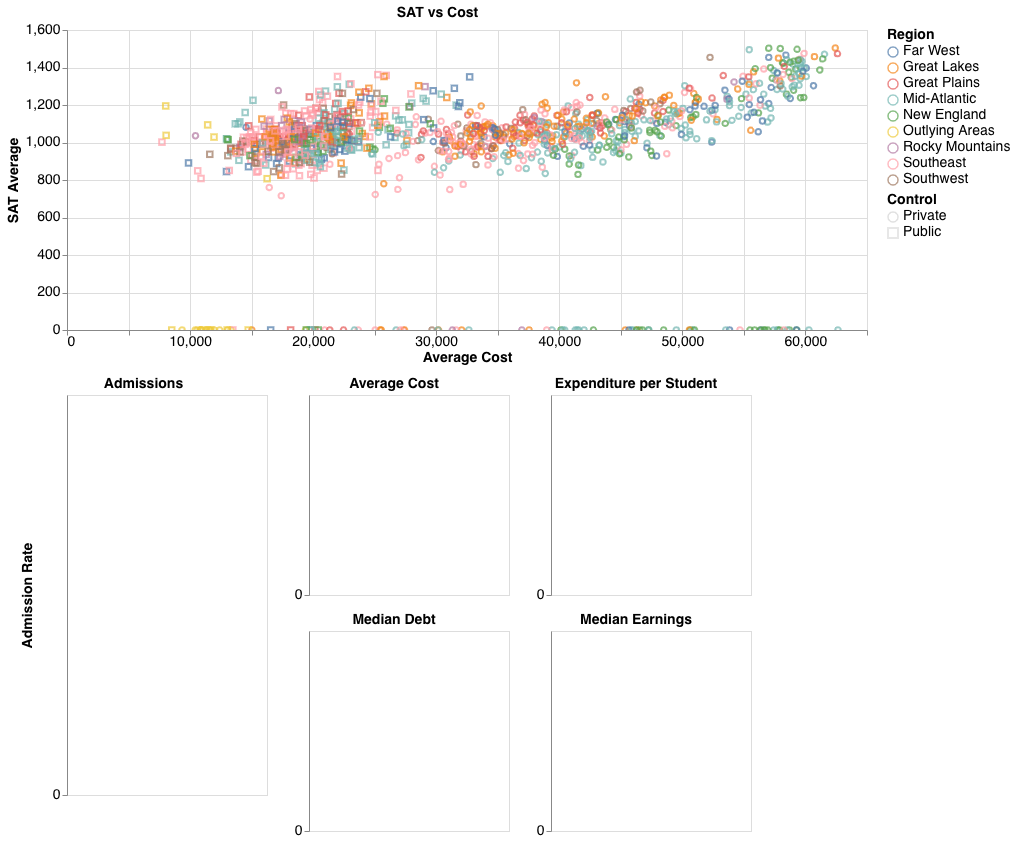

In [7]:
selection = alt.selection_multi(fields=['Average Cost', 'SAT Average'], empty = 'all')
color = alt.condition(selection,
                      alt.Color('Region:N'),
                      alt.value('lightgray')
                     )

selection2 = alt.selection_multi(fields=['Average Cost','SAT Average'], empty='none')

top = alt.Chart(colleges).mark_point().encode(
    x='Average Cost',
    y='SAT Average',
    color=color,
    shape='Control:N',
    tooltip='Name:N'
).add_selection(
    selection
).add_selection(
    selection2
).properties(
    title='SAT vs Cost',
    width=800
).interactive()

admissions = alt.Chart(colleges).mark_bar().encode(
    alt.X('Name:N', axis=None),
    y='Admission Rate:Q',
    tooltip='Name:N',
    color=color
).transform_filter(
    selection2
).properties(
    title='Admissions',
    height=400,
    width=200
)

average_cost = alt.Chart(colleges).mark_bar().encode(
    alt.X('Name:N', axis=None),
    alt.Y('Average Cost:Q', title=None),
    tooltip='Name:N',
    color=color
).transform_filter(
    selection2
).properties(
    height = 200,
    width = 200,
    title = 'Average Cost'
)

expenditure_per_student = alt.Chart(colleges).mark_bar().encode(
    alt.X('Name:N', axis=None),
    alt.Y('Expenditure Per Student:Q', title=None),
    tooltip='Name:N',
    color=color
).transform_filter(
    selection2
).properties(
    height = 200,
    width = 200,
    title = 'Expenditure per Student'
)

median_debt = alt.Chart(colleges).mark_bar().encode(
    alt.X('Name:N', axis=None),
    alt.Y('Median Debt:Q', title=None),
    tooltip='Name:N',
    color=color
).transform_filter(
    selection2
).properties(
    height = 200,
    width = 200,
    title = 'Median Debt'
)

median_earnings = alt.Chart(colleges).mark_bar().encode(
    alt.X('Name:N', axis=None),
    alt.Y('Median Earnings 8 years After Entry:Q', title=None),
    tooltip='Name:N',
    color=color
).transform_filter(
    selection2
).properties(
    height = 200,
    width = 200,
    title = 'Median Earnings'
)

# races = ['% White', '% Black', '% Hispanic', '% Asian', '% American Indian', '% Pacific Islander', '% Biracial', '% Nonresident Aliens']

# racial_demographic = alt.Chart(colleges).mark_bar().encode(
#     alt.X('Name:N', axis=None),
#     alt.Y(array('races'), title=None),
#     tooltip='Name:N',
#     color='races',
#     column='Name'
# ).transform_filter(
#     selection2
# ).properties(
#     height = 400,
#     width = 200,
#     title = 'Racial Demographic'
# )
top & (admissions | ((average_cost | expenditure_per_student) & (median_debt | median_earnings)))